In [15]:
import numpy as np
import sys
sys.path.append("../utils")
from json_tools import get_from_pool
from pool_iterator import pool_iterator
from catboost import CatBoostClassifier
from collections import Counter
from metric import calculate_metric

In [2]:
predictions_train = np.load("predictions/single_pos_3.npy")
predictions_test = np.load("predictions/single_pos_6.npy")

In [19]:
targets_train = get_from_pool(
    pool_iterator("../../../data/new_days_data_best_features/day_3.json"),
    "target",
    int
)
targets_test = get_from_pool(
    pool_iterator("../../../data/new_days_data_best_features/day_6.json"),
    "target",
    int
)
probas_test = get_from_pool(
    pool_iterator("../../../data/new_days_data_best_features/day_6.json"),
    "p",
    float
)
positions_train = get_from_pool(
    pool_iterator("../../../data/new_days_data_best_features/day_3.json"),
    "pos",
    int
)
positions_test = get_from_pool(
    pool_iterator("../../../data/new_days_data_best_features/day_6.json"),
    "pos",
    int
)

In [4]:
model = CatBoostClassifier()

In [55]:
mask = positions_train == np.argmax(predictions_train, axis=1)
train_x = np.concatenate([np.reshape(positions_train, [-1, 1]), predictions_train], axis=1)[mask]
train_y = (targets_train > 0).astype(int)[mask]

In [56]:
np.shape(train_x), np.shape(train_y)

((13123, 12), (13123,))

In [7]:
model.fit(train_x, train_y)

0:	learn: 0.6899614	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.6868388	total: 75.2ms	remaining: 37.5s
2:	learn: 0.6839427	total: 85.3ms	remaining: 28.4s
3:	learn: 0.6813094	total: 93.2ms	remaining: 23.2s
4:	learn: 0.6787037	total: 102ms	remaining: 20.4s
5:	learn: 0.6762603	total: 112ms	remaining: 18.6s
6:	learn: 0.6739955	total: 121ms	remaining: 17.1s
7:	learn: 0.6719006	total: 128ms	remaining: 15.9s
8:	learn: 0.6699191	total: 136ms	remaining: 15s
9:	learn: 0.6680789	total: 145ms	remaining: 14.4s
10:	learn: 0.6662814	total: 154ms	remaining: 13.9s
11:	learn: 0.6645984	total: 162ms	remaining: 13.3s
12:	learn: 0.6630426	total: 170ms	remaining: 12.9s
13:	learn: 0.6615426	total: 179ms	remaining: 12.6s
14:	learn: 0.6602235	total: 188ms	remaining: 12.3s
15:	learn: 0.6588835	total: 196ms	remaining: 12s
16:	learn: 0.6576245	total: 204ms	remaining: 11.8s
17:	learn: 0.6564761	total: 211ms	remaining: 11.5s
18:	learn: 0.6553843	total: 219ms	remaining: 11.3s
19:	learn: 0.6544112	total: 228ms	remaini

175:	learn: 0.6359206	total: 1.68s	remaining: 7.88s
176:	learn: 0.6358491	total: 1.7s	remaining: 7.9s
177:	learn: 0.6358426	total: 1.71s	remaining: 7.89s
178:	learn: 0.6358320	total: 1.72s	remaining: 7.87s
179:	learn: 0.6358294	total: 1.72s	remaining: 7.85s
180:	learn: 0.6358081	total: 1.73s	remaining: 7.84s
181:	learn: 0.6358022	total: 1.74s	remaining: 7.83s
182:	learn: 0.6357910	total: 1.75s	remaining: 7.81s
183:	learn: 0.6357910	total: 1.76s	remaining: 7.79s
184:	learn: 0.6357705	total: 1.77s	remaining: 7.78s
185:	learn: 0.6357503	total: 1.77s	remaining: 7.77s
186:	learn: 0.6357418	total: 1.78s	remaining: 7.76s
187:	learn: 0.6357417	total: 1.79s	remaining: 7.74s
188:	learn: 0.6357351	total: 1.8s	remaining: 7.73s
189:	learn: 0.6357262	total: 1.81s	remaining: 7.73s
190:	learn: 0.6357239	total: 1.82s	remaining: 7.72s
191:	learn: 0.6357103	total: 1.83s	remaining: 7.71s
192:	learn: 0.6356894	total: 1.84s	remaining: 7.7s
193:	learn: 0.6356835	total: 1.85s	remaining: 7.68s
194:	learn: 0.63

342:	learn: 0.6345480	total: 3.13s	remaining: 5.99s
343:	learn: 0.6345456	total: 3.14s	remaining: 5.98s
344:	learn: 0.6345409	total: 3.15s	remaining: 5.97s
345:	learn: 0.6345390	total: 3.15s	remaining: 5.96s
346:	learn: 0.6345288	total: 3.17s	remaining: 5.96s
347:	learn: 0.6345241	total: 3.17s	remaining: 5.95s
348:	learn: 0.6345134	total: 3.18s	remaining: 5.94s
349:	learn: 0.6344882	total: 3.19s	remaining: 5.93s
350:	learn: 0.6344743	total: 3.2s	remaining: 5.92s
351:	learn: 0.6344644	total: 3.21s	remaining: 5.91s
352:	learn: 0.6344630	total: 3.22s	remaining: 5.89s
353:	learn: 0.6344411	total: 3.23s	remaining: 5.89s
354:	learn: 0.6344411	total: 3.24s	remaining: 5.88s
355:	learn: 0.6344269	total: 3.25s	remaining: 5.88s
356:	learn: 0.6344260	total: 3.26s	remaining: 5.88s
357:	learn: 0.6344245	total: 3.27s	remaining: 5.87s
358:	learn: 0.6344197	total: 3.28s	remaining: 5.86s
359:	learn: 0.6344097	total: 3.29s	remaining: 5.85s
360:	learn: 0.6344088	total: 3.3s	remaining: 5.85s
361:	learn: 0.

504:	learn: 0.6329951	total: 4.57s	remaining: 4.48s
505:	learn: 0.6329909	total: 4.58s	remaining: 4.47s
506:	learn: 0.6329869	total: 4.58s	remaining: 4.46s
507:	learn: 0.6329845	total: 4.59s	remaining: 4.45s
508:	learn: 0.6329714	total: 4.6s	remaining: 4.44s
509:	learn: 0.6329572	total: 4.61s	remaining: 4.43s
510:	learn: 0.6329544	total: 4.62s	remaining: 4.42s
511:	learn: 0.6329508	total: 4.63s	remaining: 4.41s
512:	learn: 0.6329367	total: 4.63s	remaining: 4.4s
513:	learn: 0.6329327	total: 4.65s	remaining: 4.39s
514:	learn: 0.6329293	total: 4.65s	remaining: 4.38s
515:	learn: 0.6329038	total: 4.67s	remaining: 4.38s
516:	learn: 0.6328965	total: 4.67s	remaining: 4.37s
517:	learn: 0.6328963	total: 4.68s	remaining: 4.36s
518:	learn: 0.6328900	total: 4.69s	remaining: 4.35s
519:	learn: 0.6328653	total: 4.7s	remaining: 4.34s
520:	learn: 0.6328378	total: 4.71s	remaining: 4.33s
521:	learn: 0.6328375	total: 4.72s	remaining: 4.32s
522:	learn: 0.6328310	total: 4.73s	remaining: 4.31s
523:	learn: 0.6

682:	learn: 0.6316372	total: 6.18s	remaining: 2.87s
683:	learn: 0.6316354	total: 6.2s	remaining: 2.86s
684:	learn: 0.6316327	total: 6.2s	remaining: 2.85s
685:	learn: 0.6316276	total: 6.21s	remaining: 2.84s
686:	learn: 0.6316265	total: 6.22s	remaining: 2.83s
687:	learn: 0.6316233	total: 6.23s	remaining: 2.83s
688:	learn: 0.6316227	total: 6.24s	remaining: 2.81s
689:	learn: 0.6316165	total: 6.25s	remaining: 2.81s
690:	learn: 0.6316137	total: 6.25s	remaining: 2.8s
691:	learn: 0.6316104	total: 6.26s	remaining: 2.79s
692:	learn: 0.6316054	total: 6.27s	remaining: 2.78s
693:	learn: 0.6315886	total: 6.28s	remaining: 2.77s
694:	learn: 0.6315877	total: 6.29s	remaining: 2.76s
695:	learn: 0.6315815	total: 6.3s	remaining: 2.75s
696:	learn: 0.6315812	total: 6.3s	remaining: 2.74s
697:	learn: 0.6315809	total: 6.31s	remaining: 2.73s
698:	learn: 0.6315755	total: 6.32s	remaining: 2.72s
699:	learn: 0.6315500	total: 6.33s	remaining: 2.71s
700:	learn: 0.6315222	total: 6.34s	remaining: 2.7s
701:	learn: 0.6315

852:	learn: 0.6306343	total: 7.82s	remaining: 1.35s
853:	learn: 0.6306246	total: 7.83s	remaining: 1.34s
854:	learn: 0.6306242	total: 7.84s	remaining: 1.33s
855:	learn: 0.6306242	total: 7.85s	remaining: 1.32s
856:	learn: 0.6306241	total: 7.86s	remaining: 1.31s
857:	learn: 0.6306239	total: 7.87s	remaining: 1.3s
858:	learn: 0.6306237	total: 7.88s	remaining: 1.29s
859:	learn: 0.6306235	total: 7.88s	remaining: 1.28s
860:	learn: 0.6306173	total: 7.89s	remaining: 1.27s
861:	learn: 0.6306160	total: 7.9s	remaining: 1.26s
862:	learn: 0.6306073	total: 7.91s	remaining: 1.25s
863:	learn: 0.6306071	total: 7.92s	remaining: 1.25s
864:	learn: 0.6305777	total: 7.93s	remaining: 1.24s
865:	learn: 0.6305775	total: 7.93s	remaining: 1.23s
866:	learn: 0.6305775	total: 7.94s	remaining: 1.22s
867:	learn: 0.6305772	total: 7.95s	remaining: 1.21s
868:	learn: 0.6305771	total: 7.95s	remaining: 1.2s
869:	learn: 0.6305719	total: 7.96s	remaining: 1.19s
870:	learn: 0.6305670	total: 7.97s	remaining: 1.18s
871:	learn: 0.6

In [8]:
train_x = np.concatenate([
    np.reshape(np.argmax(predictions_test, axis=1), [-1, 1]),
    predictions_test
], axis=1)

In [9]:
np.shape(train_x)

(142298, 12)

In [10]:
good_or_not = model.predict(train_x)

In [12]:
Counter(good_or_not)

Counter({1.0: 81199, 0.0: 61099})

In [99]:
answer = np.argmax(predictions_test, axis=1)
metric = calculate_metric(
    answer, positions_test, targets_test, probas_test
)
print('', metric, Counter(answer))

 0.6154031368205778 Counter({4: 90548, 3: 26658, 0: 9885, 1: 8760, 2: 6447})


In [100]:
answer = np.argmax(predictions_test, axis=1)
answer[good_or_not == 0] = 4
metric = calculate_metric(
    answer, positions_test, targets_test, probas_test
)
print('', metric, Counter(answer))

 0.6158219781832751 Counter({4: 113037, 3: 16882, 0: 6679, 1: 2939, 2: 2761})


In [101]:
answer = np.argmax(predictions_test, axis=1)
answer[good_or_not == 1] = 4
metric = calculate_metric(
    answer, positions_test, targets_test, probas_test
)
print('', metric, Counter(answer))

 0.6241945859456727 Counter({4: 119809, 3: 9776, 1: 5821, 2: 3686, 0: 3206})


In [102]:
answer = np.argmax(predictions_test, axis=1)
answer[good_or_not == 0] = 4
metric = calculate_metric(
    [4] * len(positions_test), positions_test, targets_test, probas_test
)
print('', metric)

 0.624639716207228


In [112]:
train_y

array([1, 0, 1, ..., 1, 0, 1])

In [115]:
targets_train[np.argmax(predictions_train, axis=1) == positions_train]

array([1, 0, 1, ..., 1, 0, 1])

In [135]:
train_x[9], train_y[9]

(array([3.        , 1.26969532, 1.27190446, 1.27224093, 1.27240333,
        1.27071802, 1.27071802, 1.27071802, 1.27071802, 1.27071802,
        1.27071802, 1.27071802]), 1)

In [127]:
model.predict_proba(train_x[6:7])

array([[0.76559818, 0.23440182]])

In [128]:
from matplotlib import pyplot as plt
%matplotlib inline

 1.0


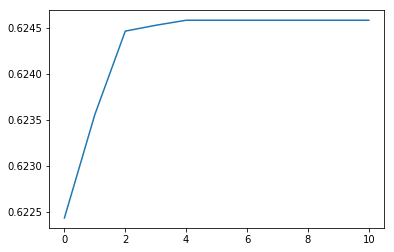

 0.0


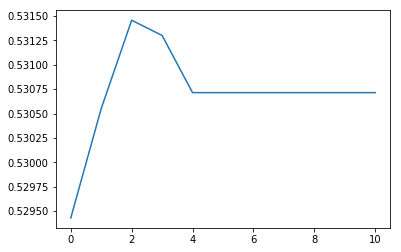

 0.0


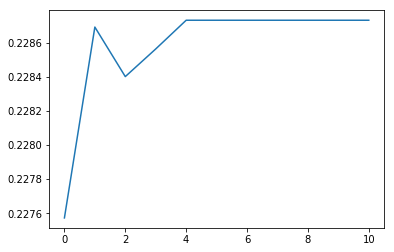

 0.0


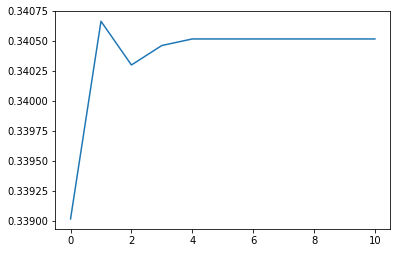

 1.0


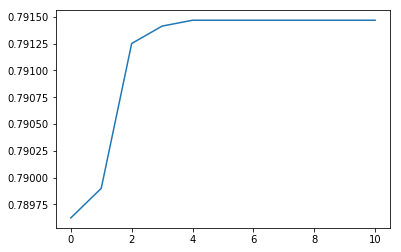

 1.0


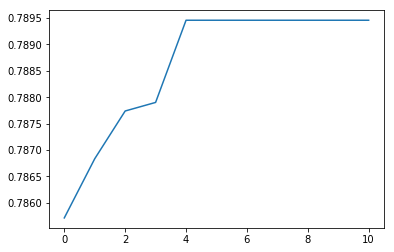

 0.0


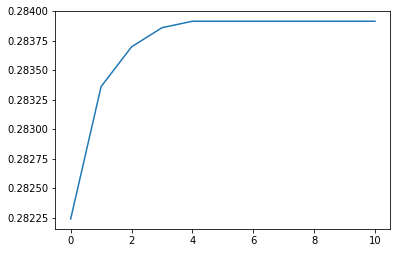

 1.0


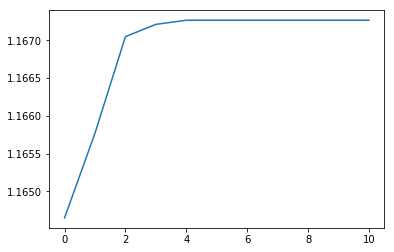

 0.0


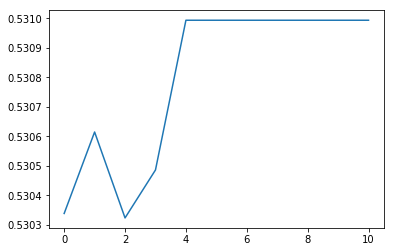

 1.0


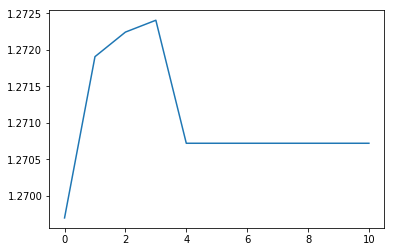

In [137]:
for i in range(10):
    print('',model.predict([train_x[i]])[0])
    plt.plot(train_x[i, 1:])
    plt.show()

In [66]:
len(answer[good_or_not == 1])

81199

In [67]:
len(answer[good_or_not != 1])

61099

In [68]:
Counter(np.argmax(predictions_test, axis=1)[good_or_not == 0])

Counter({4: 38610, 2: 3686, 1: 5821, 3: 9776, 0: 3206})

In [69]:
Counter(np.argmax(predictions_test, axis=1)[good_or_not == 1])

Counter({4: 51938, 0: 6679, 3: 16882, 2: 2761, 1: 2939})

In [70]:
Counter(train_x[:,0])

Counter({4.0: 8663, 2.0: 572, 1.0: 803, 3.0: 2469, 0.0: 616})

In [71]:
Counter(train_y)

Counter({1: 6611, 0: 6512})

In [72]:
Counter(train_y[train_x[:,0] == 4])

Counter({1: 4353, 0: 4310})

In [73]:
len(train_x), len(train_y)

(13123, 13123)

In [150]:
def softmax(array):
    return np.exp(array) / np.sum(np.exp(array))

def normalize(array):
    return array / np.mean(array)

In [146]:
train_x[0,1:]

array([0.6224368 , 0.62355796, 0.62446281, 0.62452617, 0.62458084,
       0.62458084, 0.62458084, 0.62458084, 0.62458084, 0.62458084,
       0.62458084])

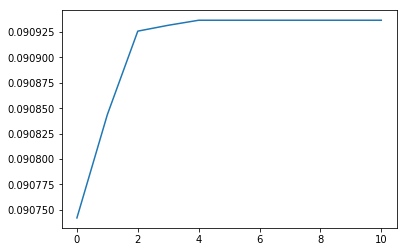

In [148]:
plt.plot(softmax(train_x[0, 1:]))

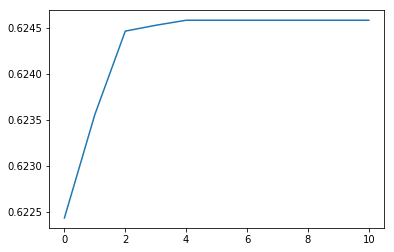

In [149]:
plt.plot(train_x[0,1:])

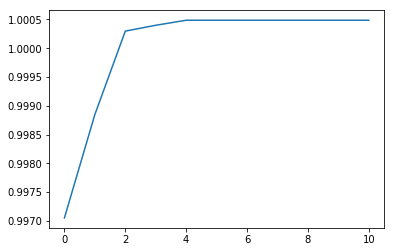

In [152]:
plt.plot(normalize(train_x[0,1:]))

In [153]:
normalize(train_x[0,1:])

array([0.99705189, 0.99884782, 1.00029726, 1.00039875, 1.00048632,
       1.00048632, 1.00048632, 1.00048632, 1.00048632, 1.00048632,
       1.00048632])